**분류 문제를 언제 사용할까?**

<br>

- 물건을 급히 팔아야 하는 상황이 왔다. 어떻게 팔아야 할까?
    - 불특정 다수에게 광고해서 판매?
    - 상황에 따른 효율적 판매를 예측해서 판매?

- 당연히 후자가 좋을 것.
- 조건(성별, 고객유형)에 따라 상품을 추천?
    - 고객의 특성에 따라 상품 쿠폰을 나눠준다고 하자.
    - 고객을 어떤 조건으로 나눠서 특성에 맞게 쿠폰을 적절히 추천해 줄 수 있을까?
    
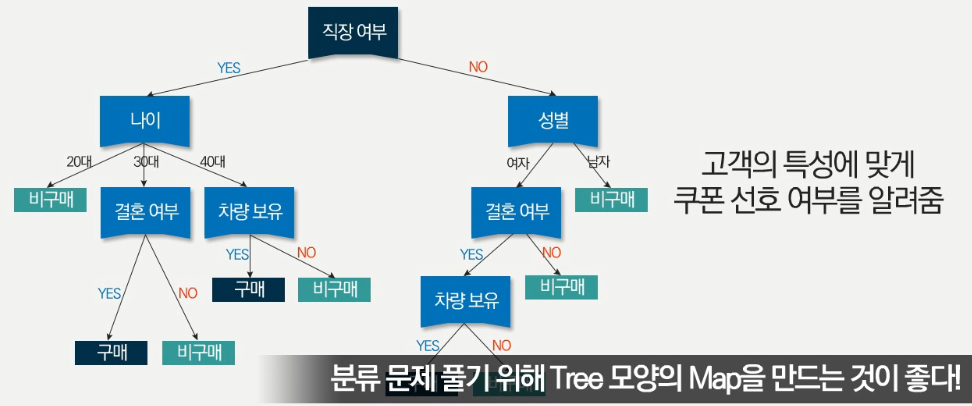

        고객을 세밀하게 분류하고자 한다면 위와 같은 Tree 모형을 통해 분류하는 것이 좋지 않을까?
        
- 새로운 고객에 대한 정보를 얻었다 가정해보자. (직장인, 30대, 기혼)
- 이 고객은 쿠폰을 좋아할까, 안 좋아할까?
    - 생성한 Tree 모형에 적용해보면 어느정도 유추할 수 있을 것.
- 의사를 묻지 않아도 결과를 예측해볼 수 있다.

- Tree 모형에서, 우리가 알고자 하는 target은 Tree의 leaf에 해당.
    - target이 있다? 지도학습 中 분류 문제.
- Root Node에서 시작해, Entropy가 크게 줄어드는 방향으로 데이터를 split해야 한다.
    - entropy가 크게 줄어든다? 

----------
**Entropy?**

<br>

- 한마디로 **무질서** 한 상태. (또는 그 정도.)

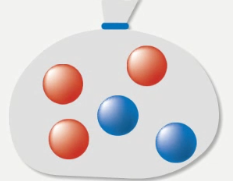

- 현재는 **Entropy가 큰 상태.** 파란구슬 2개와 빨간구슬 3개가 섞여있음.


- 이를 Entropy가 작아지도록 어떻게 분리할 수 있을까?
    - 구슬은 현재 빨간색 3개, 파란색 2개.
    - **색깔**이라는 기준으로 나눠보자.
    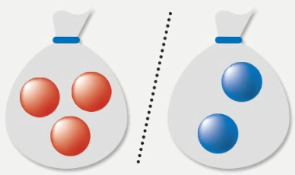
    - 이렇게 나누면 Entropy는 0. 질서있게 나눠져 있다.
        - 가장 큰폭으로 Entropy가 감소. 즉, 가장 좋은 방법으로 나눴다.
        
<br>

- 위 구슬 예시에선 **'색깔'** 이라는 기준으로 나눴더니 분류가 잘 됐음. (Entropy가 큰 폭으로 줄어들었다.)
- Decision Tree에선 이처럼 Data를 나누는 기준을 찾는 것이 중요.
    - Node에서 분기 시, 데이터를 나눠야 함. 
    - 그렇다고 그냥 막 나누면? No. 불순도가 떨어지지 않을 수 있음.

<br>

---------------
**Decision Tree를 그럼 어떻게 만들어 나갈까?**

<br>

1) Entropy 가 가장 많이 줄어드는 방향으로 기준을 설정하고, 이를 기준으로 데이터를 나눈다.
    - 단, 데이터를 속성을 기준으로 나누게 되면 데이터의 분포가 바뀌게 되므로 주의.
2) 다른 속성을 기준으로 해서, 다시 데이터를 나눈다. 마찬가지로 Entropy가 줄어드는 방향으로.
    
3) 이 과정을 Entropy가 0으로 수렴할 때 까지 반복한다. (최대한 Entropy를 줄이는 방향으로)

<br>

- 이때, 줄어든 Entropy의 차이를 **정보 이득** 이라고 함.
    - 즉, Entropy를 최소화 한다는 것은 **정보 이득을 최대화**한다는 것.
    - 정보 이득이 최대가 되도록 가지치기를 해서 데이터를 나눠야 한다.

<br>

- 엔트로피의 정의 공식은 다음과 같이 나타남.

$$ Entropy = - \sum_{i=1}^n p(x_i) * log_2 p(x_i) $$

- 확률 p? 전체 데이터에서 특정 데이터가 차지하는 비율.
    - 구슬 예시에서, 빨간색 구슬 or 파란색 구슬을 뽑았을 때의 확률.
        - 쉽게 말하면 **정보의 기댓값**. (평균값)
    - log는 왜? 정보를 표현하기 위해 필요한 정보의 비트 수(0, 1) 확인을 위해.
        - 필요한 정보의 공간이 크다? **무질서 함이 크다**. 즉, 엔트로피가 크다.
        
                정보를 표현하기 위해 필요한 모든 비트 수를 평균한 값 == Entropy
                
    - 정보가 복잡해질 수록 저장을 위한 공간이 커지는 것.
    - 음수는 왜? 지수를 양수로 만들기 위해.
- i는 뭘까? 물건의 종류. 즉, target의 갯수.
    - 구슬 예시에서, 구슬은 빨간색/파란색 이므로 i = 2인 셈.
- n은 뭘까? 물건의 총 종류 수. 즉, target을 포함한 총 data의 갯수.
- $p(x_i)$는 뭘까? 전체 데이터에서 해당 종류의 데이터를 뽑을 확률. 
    - 즉, 총 data에서 target을 뽑을 확률.

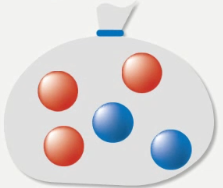

- 여기서 현재 Entropy를 간단히 계산해보자.
- 빨간구슬은 $3/5$, 파란구슬은 $2/5$ 
- 전체에 대한 기대값을 구하면 0.97이 나오고, Entropy가 높음. 불순도가 높다는 의미.

<br>

- 정보 이득의 계산은 어떻게?
    - Entropy(B) - Entropy(A) 로 계산. 말 그대로 **이전 Entropy - 현재 Entropy**. 클수록 좋겠죠?

- 나누고 난 후의 Entropy는 어떻게 될까.
    - 정확히 나뉘어졌으므로 각각의 확률은 1.
    - 따라서 Entropy 값은 각각 0이 된다. ($log_2 1 = 0$ 이니까.)
- 정보 이득은 어떻게 될까.
    - $Entropy(B) - Entropy(A) = 0.97 - 0 = 0.97$ 이 된다. 정보 이득이 아주 큼.
        - 즉, 분류가 잘 됐다는 의미.

------------
- 이를 고객 분류 case에 적용해보면?

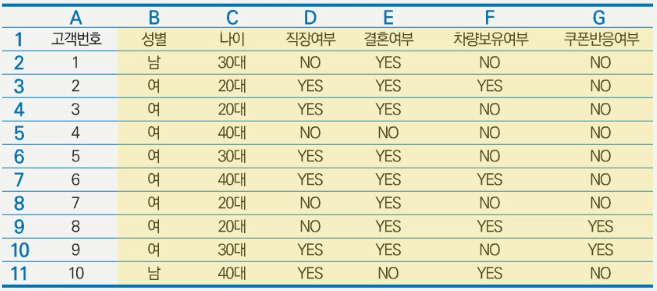

- 고객의 여러 속성에 대해, 각각의 정보 이득을 계산.
- **어떤 기준으로 나눠야 엔트로피가 가장 많이 줄어들 것**인지?
    - 계산해 보면 **결혼여부 > 성별 > 직장여부 > 차량보유여부 > 나이** 순서.
        - 결혼 여부를 기준으로 나눴을 때 정보 이득이 가장 크다. 즉, Root Node가 결혼 여부
    - 이 의미는? **목표에 영향을 미치는 변수의 중요도 순서** 로도 볼 수 있음.
        - **target 값에 가장 큰 영향을 미치는 변수의 (중요도)순서를 알 수 있다**.

----------
- 데이터 분기 후에는 데이터 분포가 바뀜.
- 분기 후에 다시 Entropy 계산, 정보 이득이 가장 높은 속성 값을 찾는다.
- 해당 속성값을 기준으로 다시 데이터 분기, 다시 Entropy 계산, .... 반복.

-----------
- 범주형 데이터에 회귀 분석을 결합시켜 연속값에 대한 예측 또한 할 수 있음.
    - 이게 뭔소리? leaf node에 회구 분석의 개수 값을 예측하도록 결합한다는 의미. Regression Tree.

-----------
**Decision Tree의 가장 기본적인 역할은 범주형 데이터를 예측하는 것.**

    범주형 데이터가 어느 class에 속할 것인지?

**Decision Tree 알고리즘?**

- CART, C4.5, C5.0 등등 다양함.
- 공통점?
    - Entropy, Gini index를 이용. 즉, **가장 영향력이 큰 속성을 찾아서 이용**.
        - Gini index? Entropy는 log값이 있어서 속도가 조금 느림. 이를 보완한 것.
        - 이 말고도 $\chi^2 score$를 사용하기도 함. 데이터가 얼마나 독립적으로 나눠졌는지 보는 것.
        
                Entropy, Gini index는 데이터의 불순도가 낮아지는 방향으로 데이터를 나누고,
                카이제곱 score는 상관관계가 가장 작아지도록 나눠감.
        
    - 주어진 data를 나누는 방법에 이용.

----------

## MNIST를 활용한 실습

In [5]:
import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree # tree에 Entropy를 이용해 의사결정트리를 만드는 방법이 있음.

# 모델 평가를 위한 module import.
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
# data loading
digits = datasets.load_digits()

# 데이터 확인
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


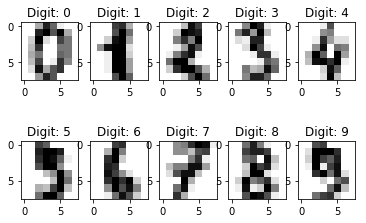

In [4]:
# image show
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

In [7]:
# label과 img는 뭘까. 출력해보자.
label, img, img.shape

(9, array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]), (8, 8))

    9 라는 데이터가 의미하는 그림을 수치로 나타낸 값. 8*8 matrix 형태.

In [8]:
images = digits.images
labels = digits.target

# 차원 줄이기.
# 64 size의 vector로 만들어 input으로 사용.
images = images.reshape(images.shape[0], -1)

# 결정트리 생성 후 학습.
n_samples = len(images)
train_size = int(n_samples * 2 / 3) # train_test_split 대신 이렇게 해도 되긴 함.
classifier = tree.DecisionTreeClassifier(max_depth = 3) # 최대 깊이는 3으로 설정.
classifier.fit(images[:train_size], labels[:train_size])

DecisionTreeClassifier(max_depth=3)

In [9]:
# 생성한 결정트리의 성능 확인
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy : \n', accuracy_score(expected, predicted))
print('Confusion Matrix : \n', confusion_matrix(expected, predicted))

Accuracy : 
 0.44908180300500833
Confusion Matrix : 
 [[57  0  1  0  1  0  0  0  0  0]
 [ 0  0 25 16  6  0  0 15  0  0]
 [ 1  0 49  6  0  1  0  3  0  0]
 [ 0  0 10 46  0  0  0  5  0  1]
 [ 4  0 27  0 30  0  0  1  0  0]
 [ 0  0  2 29 20  5  0  3  0  0]
 [ 0  0 55  5  0  1  0  0  0  0]
 [ 0  0  0  0  6  0  0 55  0  0]
 [ 0  0 33  6  2  1  0 13  0  0]
 [ 2  0  1 21  7  0  0  0  0 27]]


- 세로는 실제값, 가로는 예측값.
- 혼동 행렬에서 **대각선에 숫자가 많이 모여있으면 좋은 모델**이라는 의미.

    DT로도 숫자 인식/분류를 할 수 있긴 하구나...

In [10]:
expected

array([4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,
       7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4,
       6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7,
       4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7,
       5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5,
       1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,

In [11]:
predicted

array([2, 2, 7, 7, 7, 2, 2, 0, 0, 2, 2, 7, 7, 2, 0, 7, 2, 2, 9, 3, 4, 3,
       3, 0, 2, 2, 2, 4, 3, 2, 7, 0, 3, 3, 2, 7, 2, 0, 0, 7, 7, 2, 3, 2,
       7, 4, 2, 2, 3, 7, 3, 9, 2, 7, 2, 7, 2, 3, 4, 4, 0, 7, 3, 2, 3, 2,
       4, 4, 5, 2, 4, 7, 2, 2, 2, 2, 5, 7, 3, 4, 2, 7, 2, 4, 9, 0, 7, 3,
       2, 0, 3, 2, 3, 2, 3, 2, 7, 2, 3, 0, 2, 3, 3, 0, 3, 2, 7, 2, 9, 0,
       3, 2, 3, 0, 3, 2, 7, 7, 9, 0, 9, 3, 3, 2, 4, 2, 3, 7, 3, 2, 2, 2,
       7, 7, 3, 3, 2, 0, 0, 2, 3, 7, 2, 3, 0, 3, 3, 2, 3, 3, 4, 2, 3, 0,
       2, 2, 2, 4, 9, 2, 3, 0, 9, 2, 2, 2, 3, 0, 0, 2, 7, 2, 3, 2, 2, 7,
       2, 2, 3, 7, 3, 2, 2, 7, 2, 7, 2, 3, 7, 4, 0, 4, 3, 5, 9, 2, 7, 7,
       4, 2, 2, 7, 3, 2, 2, 2, 3, 7, 3, 4, 2, 7, 4, 2, 0, 0, 7, 0, 3, 2,
       3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4,
       3, 2, 7, 2, 9, 0, 9, 3, 3, 2, 3, 0, 9, 2, 9, 2, 2, 3, 7, 4, 3, 3,
       3, 0, 0, 2, 2, 7, 3, 2, 0, 3, 2, 3, 3, 3, 7, 3, 3, 4, 2, 2, 2, 4,
       9, 3, 3, 0, 9, 3, 2, 2, 2, 0, 0, 3, 7, 3, 3,

## Iris를 분류해보자.

In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [16]:
iris = load_iris()

In [17]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
iris.target # 총 3개의 클래스.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# 모델 생성
model = DecisionTreeClassifier(random_state=0)
cross_val_score(model, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [24]:
# 모델 학습 및 예측
model.fit(iris.data, iris.target)
model.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
# 예측이 잘 됐을까?
iris.target == model.predict(iris.data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [26]:
# 정확도는 얼마나 될까
import numpy as np
np.mean(iris.target == model.predict(iris.data))

1.0

    오잉?

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


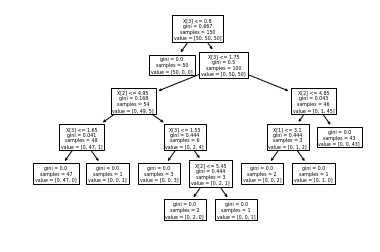

In [27]:
tree.plot_tree(model)